새로 개발한 측정기기의 측정값과 기존의 표준기기 측정값간의 상관관계

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(7)

## 데이터 준비

In [37]:
def create_data():
    g = np.random.normal(200, 50, 100)

    r = np.random.normal(3, 5, 100)
    a = 0.3 * g - 10 + r
    
    r = np.random.normal(3, 5, 100)
    b = 70 + r
    
    ds_a = list(zip(a, g))
    ds_b = list(zip(b, g))
    
    df_a = pd.DataFrame(ds_a, columns = ['measured', 'gold_standard'])
    df_b = pd.DataFrame(ds_b, columns = ['measured', 'gold_standard'])

    df_a.to_csv(r'dataset_a.csv', index = None, header = True)
    df_b.to_csv(r'dataset_b.csv', index = None, header = True)
    
def load_data(filename):
    return pd.read_csv(filename)

create_data()

df_a = load_data('dataset_a.csv')
df_b = load_data('dataset_b.csv')

## 데이터 탐색

In [38]:
df_a.head()

,measured,gold_standard
0,48.997042,173.121722
1,66.384895,215.555755
2,54.169527,227.285628
3,11.803856,62.305237
4,23.364769,105.985468


In [39]:
df_a.describe()

,measured,gold_standard
count,100.000000,100.000000
mean,49.143287,187.619552
std,14.776443,45.691928
min,11.803856,62.305237
25%,39.434315,161.724897
50%,51.650021,193.901841
75%,57.449533,215.602525
max,83.975727,307.195953


In [40]:
df_b.head()

,measured,gold_standard
0,68.986977,173.121722
1,74.534323,215.555755
2,71.582926,227.285628
3,75.300071,62.305237
4,68.681635,105.985468


In [41]:
df_b.describe()

,measured,gold_standard
count,100.000000,100.000000
mean,72.494860,187.619552
std,4.880996,45.691928
min,58.043020,62.305237
25%,69.131574,161.724897
50%,71.916884,193.901841
75%,75.590695,215.602525
max,85.640166,307.195953


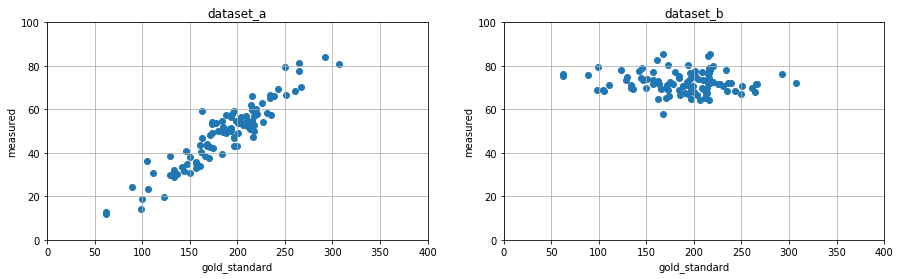

In [57]:
g = df_a['gold_standard']
a = df_a['measured']
b = df_b['measured']

plt.figure(figsize = (15, 4))

plt.subplot(121)
plt.scatter(g, a)
plt.xlim(0, 400)
plt.ylim(0, 100)
plt.grid(True)
plt.xlabel('gold_standard')
plt.ylabel('measured')
plt.title('dataset_a')

plt.subplot(122)
plt.scatter(g, b)
plt.xlim(0, 400)
plt.ylim(0, 100)
plt.grid(True)
plt.xlabel('gold_standard')
plt.ylabel('measured')
plt.title('dataset_b')

plt.show()

## 기존의 믿음

(0, 32)

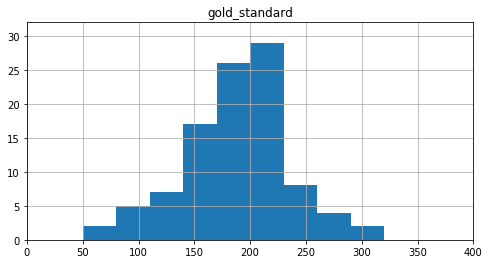

In [81]:
df_a.hist(column = 'gold_standard', bins = 10, range = (50, 350), figsize = (8, 4))
plt.xlim(0, 400)
plt.ylim(0, 32)

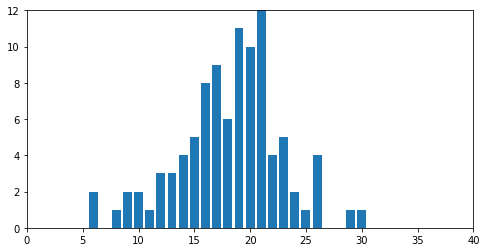

In [65]:
frequency_table = np.zeros(40)
for v in g:
    idx = int(v / 10)
    frequency_table[idx] += 1
    
x = np.arange(40)

plt.figure(figsize = (8, 4))
plt.bar(x, frequency_table)
plt.xlim(0, 40)
plt.ylim(0, 12)
plt.show()

## 가능도

In [ ]:
def get_posteriori(w_prior, w_actual, w_measured_arr):
    l_measured = stats.norm.pdf(w_measured_arr, w_actual, s_actual)
    weighting = stats.norm.pdf(w_actual, w_prior, s_prior)
    posteriori = np.prod(l_measured * weighting)
    return posteriori